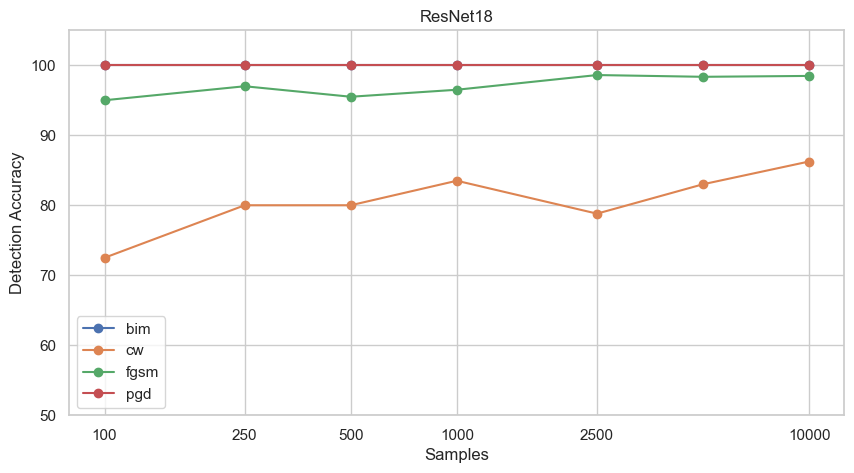

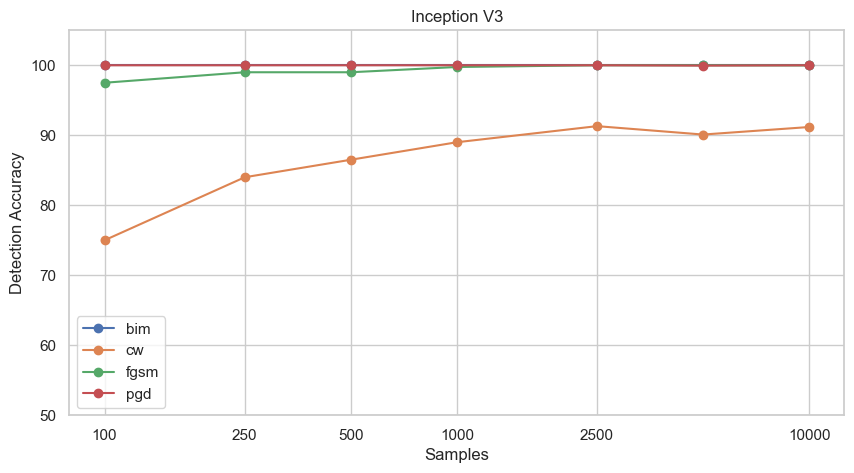

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('../results.csv')

# Filter data for each model
resnet_data = data[data['model_name'] == 'resnet18']
inception_data = data[data['model_name'] == 'inception_v3']

# Group by attack_name and samples, and take the maximum accuracy
resnet_data = resnet_data.groupby(['attack_name', 'samples'], as_index=False)['accuracy'].max()
inception_data = inception_data.groupby(['attack_name', 'samples'], as_index=False)['accuracy'].max()

# Filter out the samples less than 100
resnet_data = resnet_data[resnet_data['samples'] >= 100]
inception_data = inception_data[inception_data['samples'] >= 100]

# Define specific x-axis marks
x_marks = [100, 250, 500, 1000, 2500, 10000]

# Set the seaborn style
sns.set(style='whitegrid')

# Plot for resnet
plt.figure(figsize=(10, 5))
resnet_min_acc = resnet_data['accuracy'].min()
resnet_max_acc = resnet_data['accuracy'].max()
for i, attack in enumerate(resnet_data['attack_name'].unique()):
    subset = resnet_data[resnet_data['attack_name'] == attack]
    plt.plot(subset['samples'], subset['accuracy'], marker='o', linestyle='-', label=attack, color=f'C{i}')
sns.scatterplot(data=resnet_data, x='samples', y='accuracy', hue='attack_name', legend=False, alpha=0.5)
plt.xscale('log')
plt.xticks(x_marks, x_marks)
plt.title('ResNet18')
plt.xlabel('Samples')
plt.ylabel('Detection Accuracy')
plt.ylim(50, resnet_max_acc + 5)
plt.legend()
plt.savefig('resnet_plot.png',dpi=300)

# Plot for inception
plt.figure(figsize=(10, 5))
inception_min_acc = inception_data['accuracy'].min()
inception_max_acc = inception_data['accuracy'].max()
for i, attack in enumerate(inception_data['attack_name'].unique()):
    subset = inception_data[inception_data['attack_name'] == attack]
    plt.plot(subset['samples'], subset['accuracy'], marker='o', linestyle='-', label=attack, color=f'C{i}')
sns.scatterplot(data=inception_data, x='samples', y='accuracy', hue='attack_name', legend=False, alpha=0.5)
plt.xscale('log')
plt.xticks(x_marks, x_marks)
plt.title('Inception V3')
plt.xlabel('Samples')
plt.ylabel('Detection Accuracy')
plt.ylim(50, inception_max_acc + 5)
plt.legend()
plt.savefig('inception_plot.png', dpi=300)

plt.show()
